# Análise preditiva para Marketing em Investimentos

Este projeto analisa dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Resumo das ações:
1. **leitura**
2. **análise exploratória**
3. **separação**
4. **transformação** dos dados
5. **ajuste**
6. **avaliação**
7. **comparação** dos modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

In [55]:
import pandas as pd
dbLink = 'https://raw.githubusercontent.com/PJbourne/Data_Science_course/refs/heads/main/marketing_investimento%20-%20marketing_investimento.csv'
df = pd.read_csv(dbLink)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

### Variáveis categóricas

In [57]:
import plotly.express as px
df.aderencia_investimento.value_counts()
fig = px.histogram(df, x='aderencia_investimento', text_auto=True)
fig.show()

In [58]:
fig = px.histogram(df, x='estado_civil', color = 'aderencia_investimento', barmode = 'group', text_auto=True)
fig.show()
df.estado_civil.value_counts()


,count
estado_civil,
casado (a),738
solteiro (a),368
divorciado (a),162


In [59]:
fig = px.histogram(df, x='escolaridade', color = 'aderencia_investimento', barmode = 'group', text_auto=True)
fig.show()
df.escolaridade.value_counts()

,count
escolaridade,
medio,662
superior,413
fundamental,193


### Variáveis numéricas

In [60]:
fig = px.histogram(df, x='inadimplencia', color = 'aderencia_investimento', barmode = 'group', text_auto=True)
fig.show()
df.inadimplencia.value_counts()

,count
inadimplencia,
nao,1245
sim,23


In [61]:
fig = px.histogram(df, x='escolaridade', color = 'aderencia_investimento', barmode = 'group', text_auto=True)
fig.show()
df.escolaridade.value_counts()

,count
escolaridade,
medio,662
superior,413
fundamental,193


In [62]:
px.box(df, y='idade', color = 'aderencia_investimento')

In [63]:
px.box(df, y='saldo', color = 'aderencia_investimento')

In [64]:
px.box(df, y='tempo_ult_contato', color = 'aderencia_investimento')

In [65]:
px.box(df, y='numero_contatos', color = 'aderencia_investimento')

# Tranformação de dados

## Variáveis explicativas e variável alvo

In [17]:
x = df.drop('aderencia_investimento', axis = 1)
y = df['aderencia_investimento']

## Transformando as variáveis explicativas

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [19]:
colunas = []
for coluna in x.columns:
  if x[coluna].dtype == 'object':
    colunas.append(x[coluna])

In [20]:
one = make_column_transformer( (OneHotEncoder(drop="if_binary"), ['estado_civil', 'escolaridade', 'inadimplencia',
       'fez_emprestimo']),
                              remainder='passthrough',#não exclui valores numericos
                               sparse_threshold=0)#não criar matrix esparça

In [21]:
new_x = one.fit(x)

In [22]:
new_columns = new_x.get_feature_names_out()

In [23]:
new_df = pd.DataFrame(new_x.transform(x), columns=new_columns)

In [24]:
new_df[new_df['onehotencoder__inadimplencia_sim'] == 1].columns

Index(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim', 'onehotencoder__fez_emprestimo_sim',
       'remainder__idade', 'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'],
      dtype='object')

## Transformando a variável alvo

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
Y = label_encoder.fit_transform(y)

In [28]:
Y

array([1, 1, 0, ..., 1, 1, 1])

# Ajustando modelos

## Dividindo os dados entre treino e teste

In [29]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, Y, test_size=0.25, stratify=y, random_state=1234)

## Modelo de base

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

DummyClassifier()

In [32]:
dummy.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
dummy.score(x_test, y_test)

0.6046267087276551

## Árvore de decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [35]:
x_test, x_train, y_test, y_train = train_test_split(new_df, Y, test_size=0.25, stratify=y, random_state=1234)

In [36]:
tree = DecisionTreeClassifier(max_depth=3, random_state=4321)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=4321)

In [37]:
tree.score(x_test, y_test)

0.729758149316509

In [38]:
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'remainder__tempo_ult_contato <= 323.5\ngini = 0.479\nsamples = 317\nvalue = [191.0, 126.0]\nclass = sim'),
 Text(0.25, 0.625, 'remainder__tempo_ult_contato <= 152.5\ngini = 0.34\nsamples = 198\nvalue = [155, 43]\nclass = sim'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'remainder__idade <= 21.5\ngini = 0.154\nsamples = 95\nvalue = [87, 8]\nclass = sim'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = não'),
 Text(0.1875, 0.125, 'gini = 0.138\nsamples = 94\nvalue = [87, 7]\nclass = sim'),
 Text(0.375, 0.375, 'remainder__idade <= 57.5\ngini = 0.449\nsamples = 103\nvalue = [68, 35]\nclass = sim'),
 Text(0.3125, 0.125, 'gini = 0.407\nsamples = 88\nvalue = [63.0, 25.0]\nclass = sim'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = não'),
 Text(0.75, 0.625, 'onehotencoder__escolaridade_fundamental <= 0.5\ngini = 0.422\nsamples = 119\nvalue = [36, 83]\nclass = não'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.37

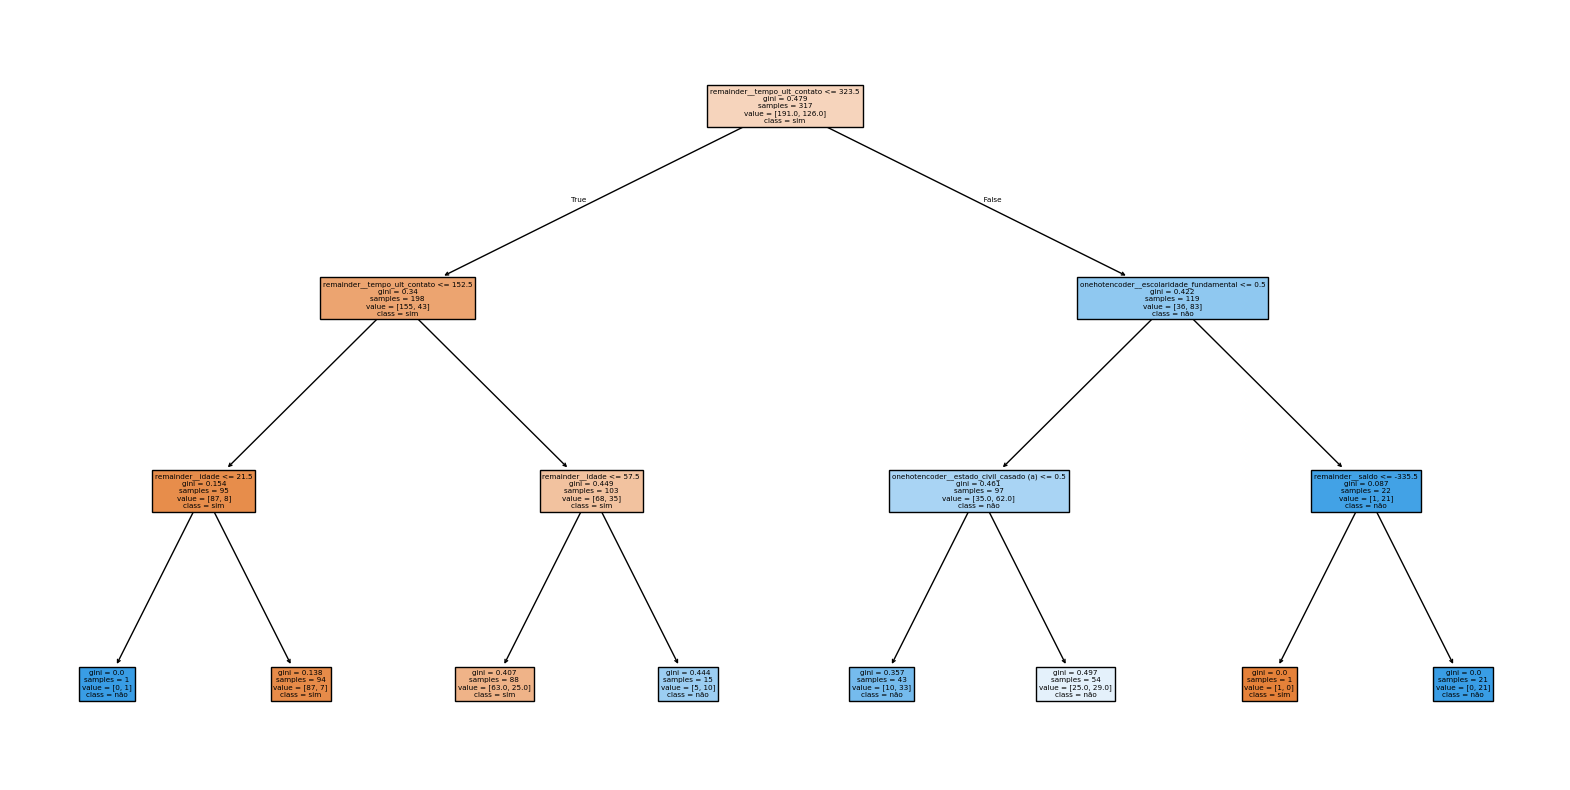

In [39]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=new_columns, class_names=['sim', 'não'] ,filled=True)

# Seleção de modelos

## Normalizando os dados

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
minmax = MinMaxScaler()

In [42]:
x_train_normalized = minmax.fit_transform(x_train)
x_test_normalized = minmax.transform(x_test)

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier() # default n_neighbors=5

In [45]:
modelo = knn.fit(x_train_normalized, y_train)

In [46]:
teste = knn.score(x_test_normalized, y_test)

## Escolhendo e salvando o melhor modelo

In [47]:
print(f"{round(dummy.score(x_test, y_test),2)}")
print(f"{round(tree.score(x_test, y_test),2)}")
print(f"{round(knn.score(x_test_normalized, y_test),2)}")

0.6
0.73
0.67


## Pickle Dump

In [48]:
pd.to_pickle(tree, "modelo-inadinplencia.pkl")

### Usando um modelo

In [49]:
new_data = {
    'idade':[45],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [50]:
pd.to_pickle(new_x, "discretizador.pkl") # salvar o OneHotEncoder para aplicar ás variaveis de entrada da previsão

In [51]:
model = pd.read_pickle("modelo-inadinplencia.pkl") # carregar modelo salvo

In [52]:
one_hot = pd.read_pickle("discretizador.pkl") # carrega OneHotEncoder

In [53]:
novos_dados = one_hot.transform(pd.DataFrame(new_data)) # Aplicar OneHotEncoder aos dados de entrada

In [54]:
print(model.predict(novos_dados)) # Previsão

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

